In [42]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization

#Load dataset
data = pd.read_csv("worldwide_happiness_report.csv")
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Label
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


### Explanation of Features

<b>Country :</b> Name of the country.

<b>Region :</b> Region the country belongs to.

<b>Happiness Rank :</b> Rank of the country based on the Happiness Score.

<b>Happiness Score :</b> A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

<b>Economy :</b> real GDP per capita

<b>Family :</b> social support

<b>Health: </b> healthy life expectancy

<b>Freedom :</b> freedom to make life choices

<b>Trust :</b> perceptions of corruption

<b>Generosity :</b> perceptions of generosity

<b>Dystopia :</b> each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark

In [52]:
y = data['Score']
x = data[['GDP per capita','Social support','Healthy life expectancy','Perceptions of corruption']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)
train = x_train.join(y_train)
corr_mat = train.corr()
corr_mat['GDP per capita'].sort_values(ascending = False)

GDP per capita               1.000000
Healthy life expectancy      0.845937
Score                        0.798413
Social support               0.770009
Perceptions of corruption    0.311332
Name: GDP per capita, dtype: float64

<AxesSubplot:>

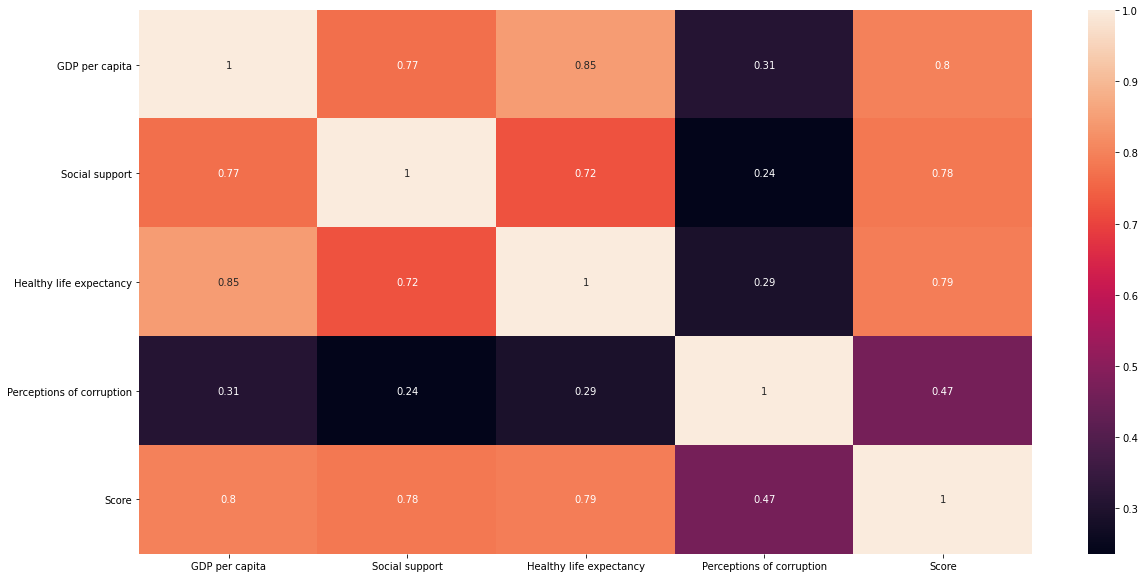

In [53]:
fig = plt.subplots(figsize = (20,10))
sns.heatmap(train.corr(), annot = True)

### Machine Learning model using KNN algorithm

<B>Algorithm</B>

K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm.  Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.
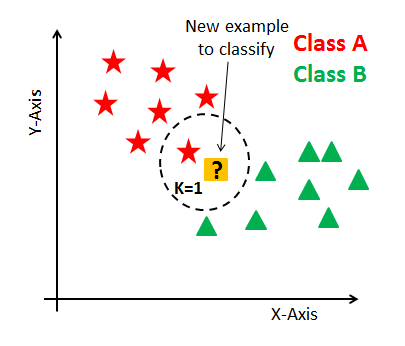

<B>PROS</B>

The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

<B>CONS</B>


The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large values.

In [39]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.3) # 70% training and 30% test

In [40]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [41]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100 ,'%')

Accuracy: 74.07407407407408 %
